<a href="https://colab.research.google.com/github/Akhorramrouz/CS461/blob/main/knn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Tutorial
This tutorial walks you through KNN step by step using Python and scikit-learn.

## 1. Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


## 2. Load Example Dataset

In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to dataframe for readability
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Train/Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 4. Train a KNN Classifier

In [4]:
# Create and fit KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 5. Evaluate the Model

In [5]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 6. Effect of Choosing Different k

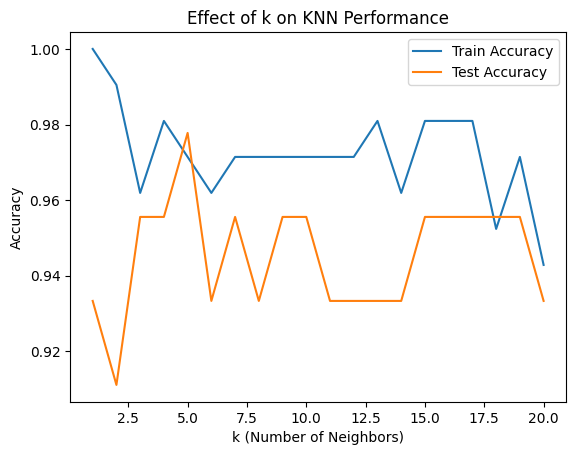

In [6]:
train_accs = []
test_accs = []
ks = range(1, 21)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accs.append(knn.score(X_train, y_train))
    test_accs.append(knn.score(X_test, y_test))

plt.plot(ks, train_accs, label="Train Accuracy")
plt.plot(ks, test_accs, label="Test Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of k on KNN Performance")
plt.show()


## 7. Visualizing Decision Boundaries (2D Dataset Example)

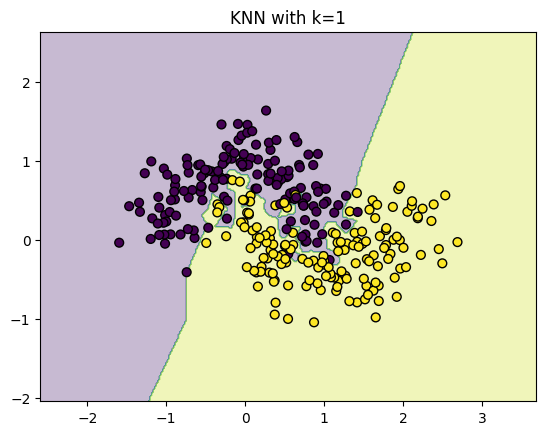

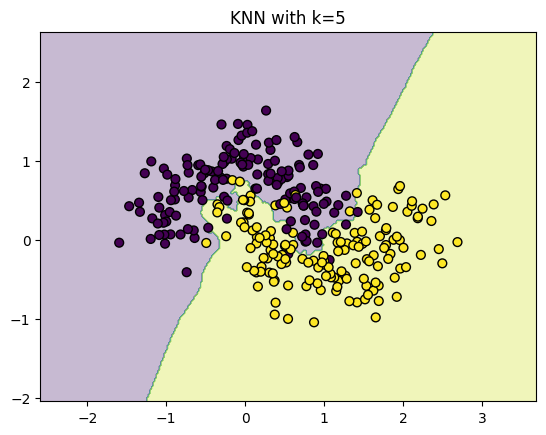

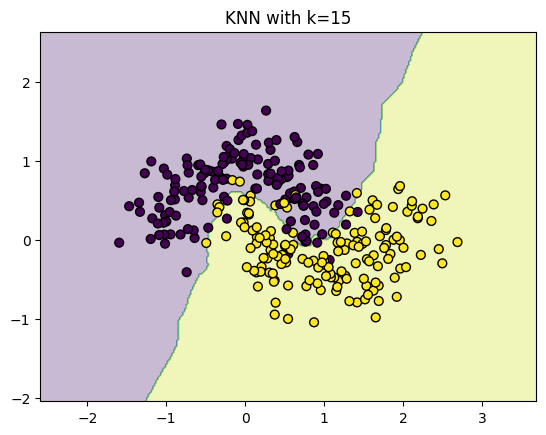

In [7]:
# Make a toy dataset for visualization
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_decision_boundary(knn, X, y, title):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.show()

for k in [1, 5, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(knn, X, y, f"KNN with k={k}")


## 8. Summary
- KNN is a simple, non-parametric algorithm.
- Works well with small datasets and low dimensions.
- Sensitive to the choice of **k** and feature scaling.
- Forms the basis of many similarity-based methods in ML.